In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import bambi as bmb
import xarray as xr
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

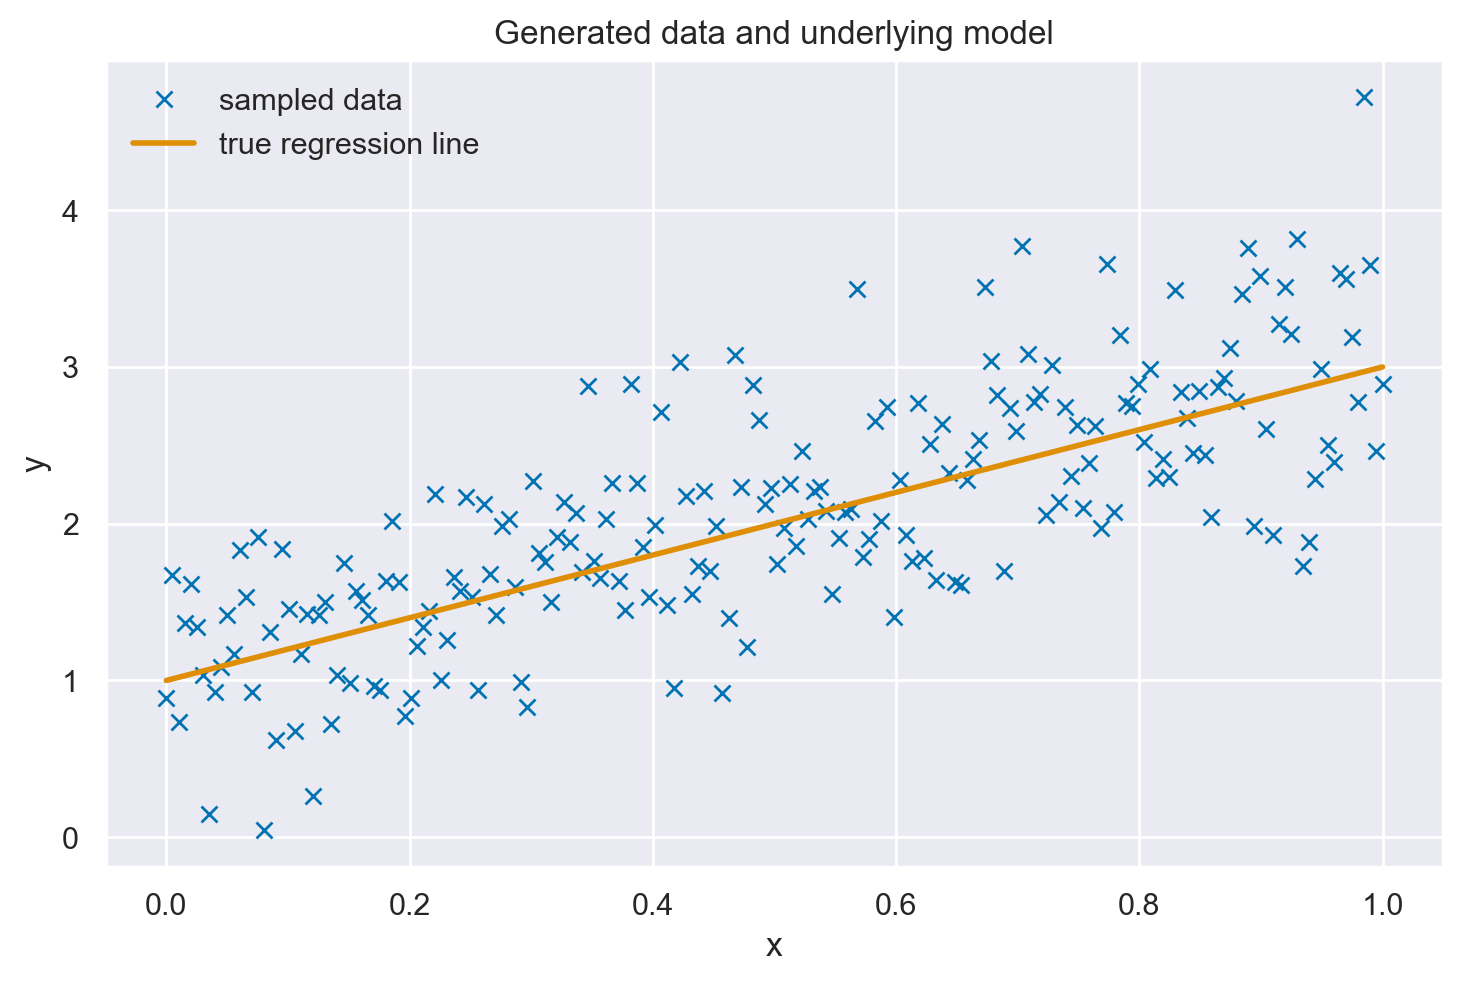

In [4]:
plt.plot(x, y, "x", label="sampled data")
plt.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated data and underlying model")
plt.legend(loc=0);

In [5]:
model = bmb.Model("y ~ x", data)

In [6]:
idata = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:02.321192


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 917.62it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 918.33it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 919.22it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 919.86it/s]


Sampling time = 0:00:02.526555


Transforming variables...


Transformation time = 0:00:00.104314


Computing Log Likelihood...


Log Likelihood time = 0:00:00.194566


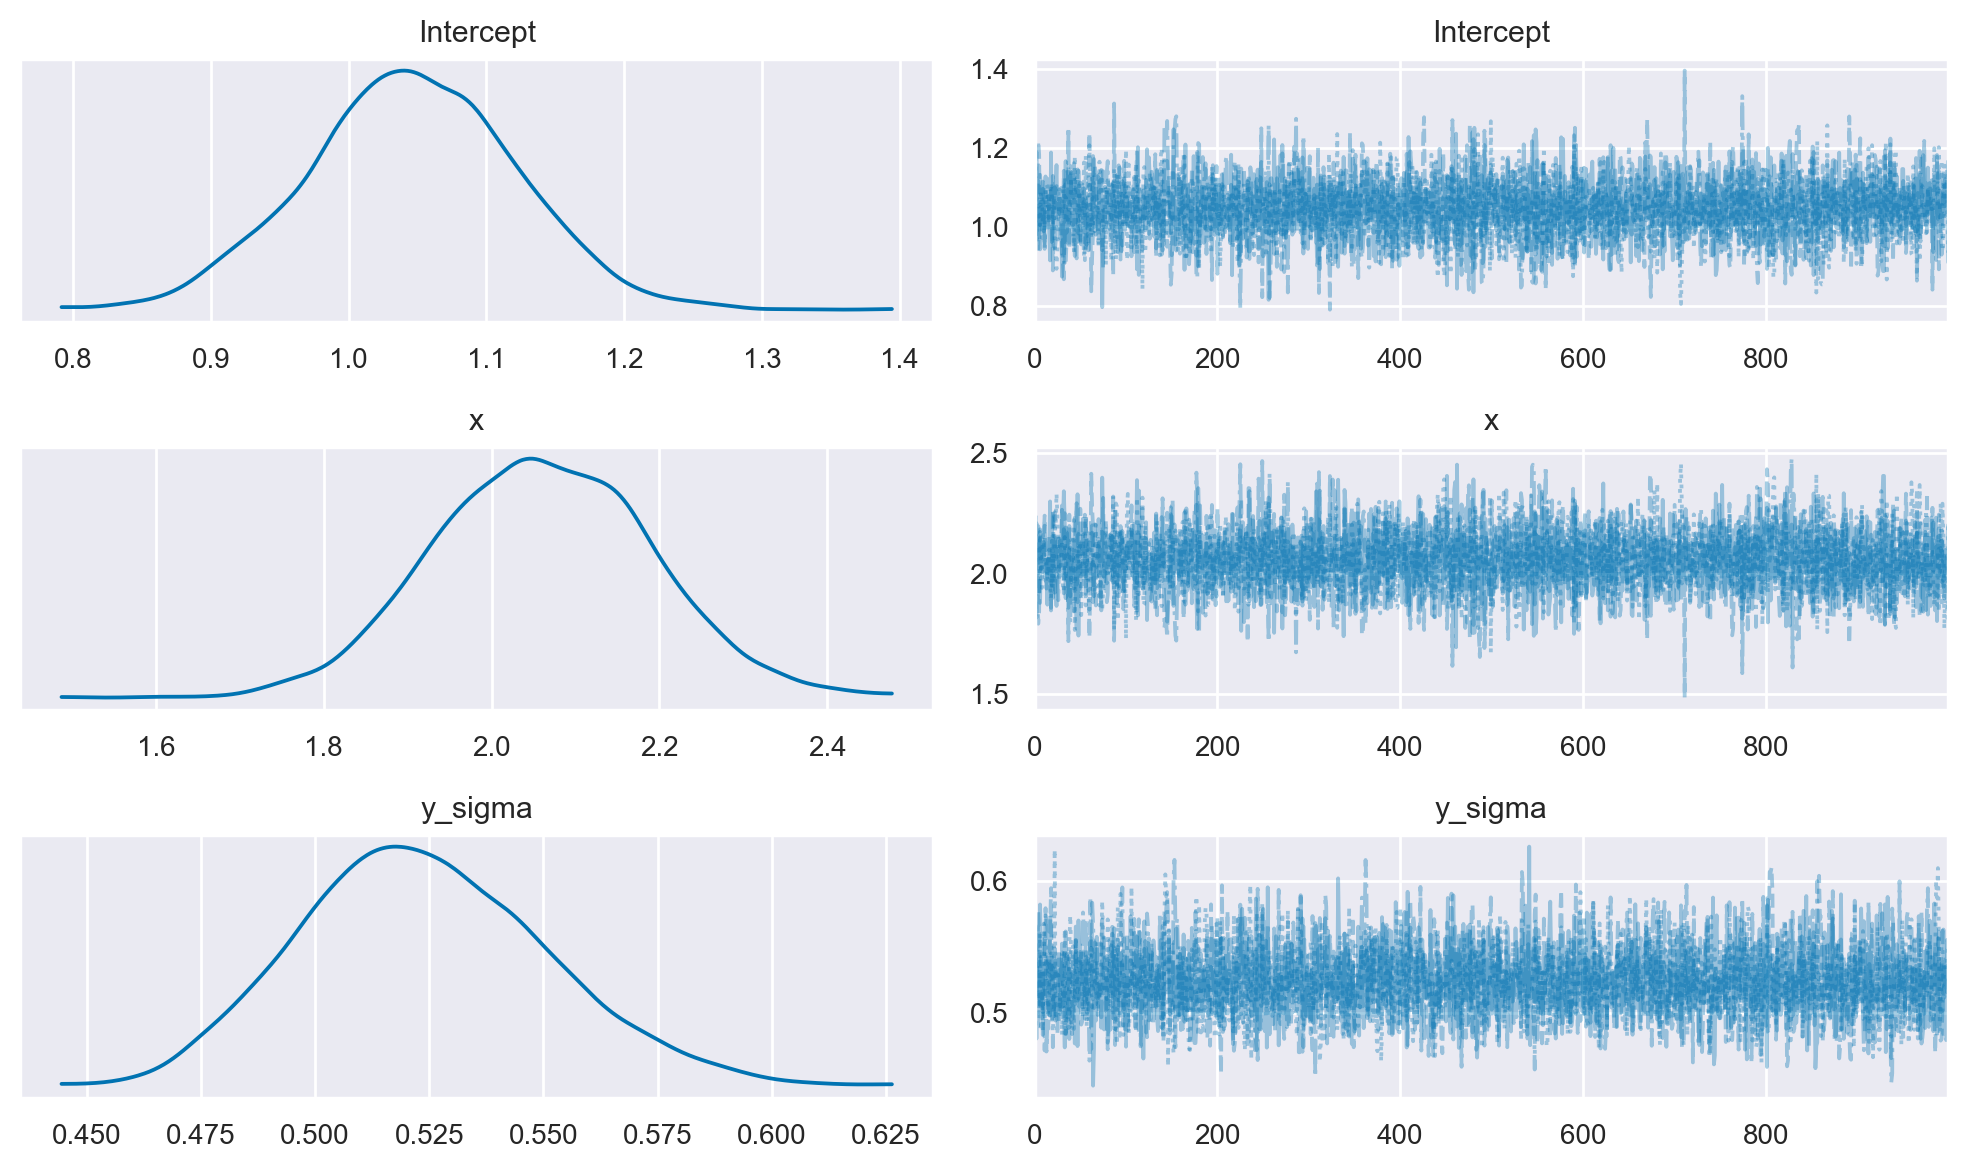

In [7]:
az.plot_trace(idata, combined=True, figsize=(10, 6))
plt.tight_layout();

In [8]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.05,0.08,0.90,1.18,0.0,0.0,4219.19,2857.14,1.0
x,2.06,0.13,1.81,2.29,0.0,0.0,4268.37,2812.29,1.0
y_sigma,0.52,0.03,0.47,0.57,0.0,0.0,3708.87,2735.01,1.0


In [9]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

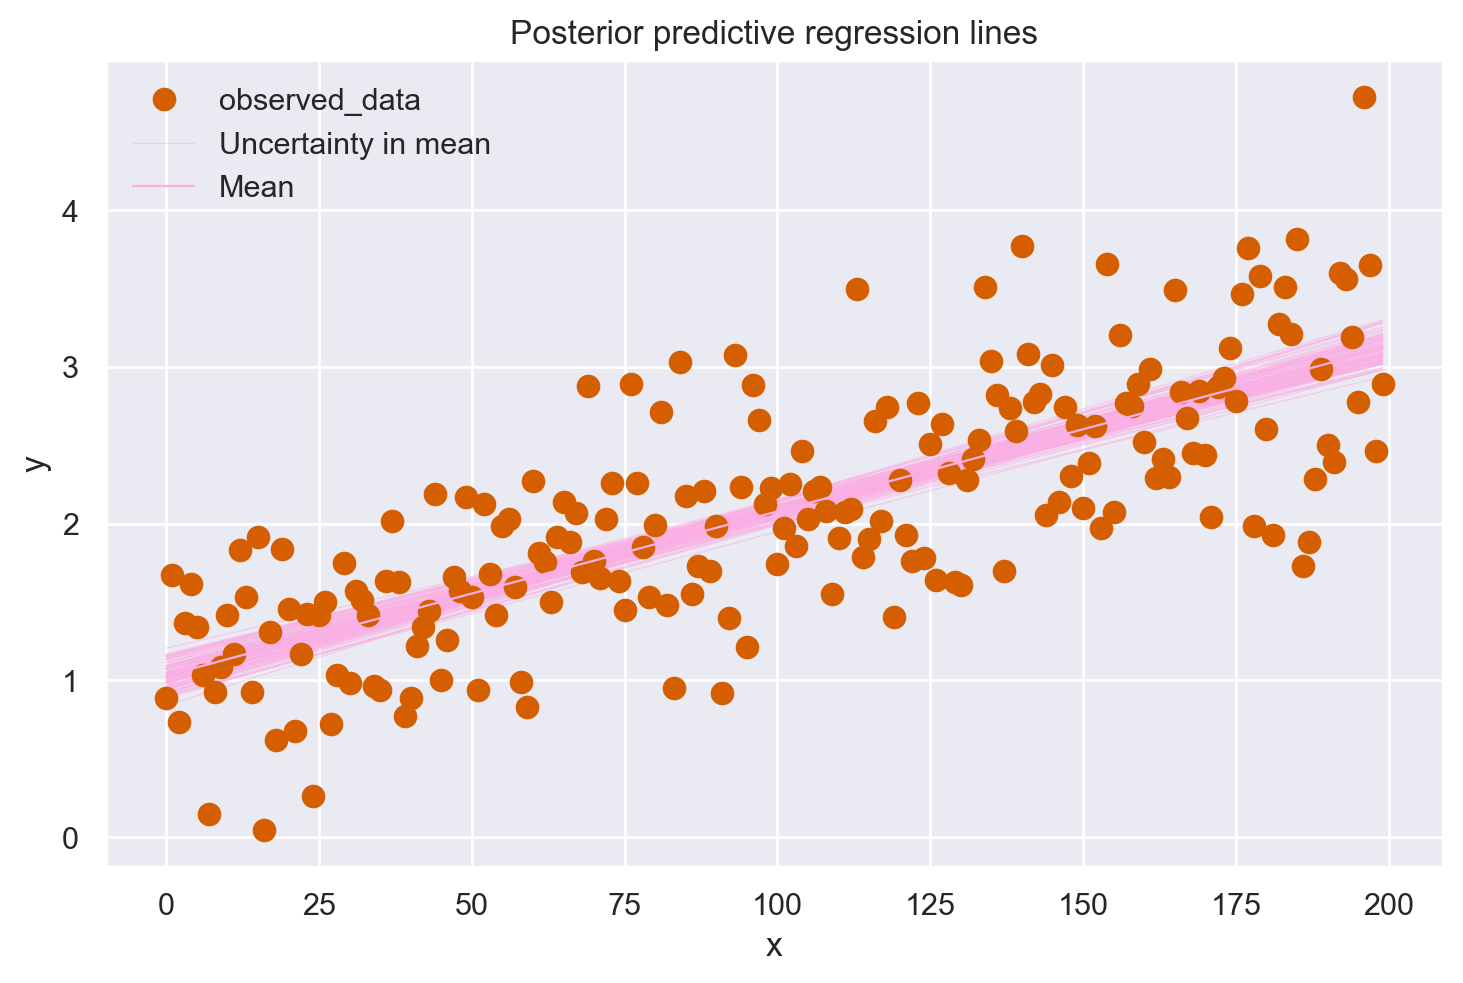

In [10]:
az.plot_lm(idata=idata, y="y", num_samples=100, y_model="y_model")
plt.title("Posterior predictive regression lines")
plt.xlabel("x");

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Thu Jan 25 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pytensor: 2.18.4

arviz     : 0.17.0
numpy     : 1.26.2
matplotlib: 3.8.2
xarray    : 2023.12.0
bambi     : 0.13.0
seaborn   : 0.13.0
pandas    : 2.1.4

Watermark: 2.4.3

